In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [2]:
density = 4.81              #g/cm**3
mass = 98.480               #g
mollar_mass = 183.49        #g/mol
volume = mass/density       #cm**3
N_mol = mass/mollar_mass    #mol
e_mass = 9.11E-28           #g
mi_0 = 12.57E-7             #(Vs)/(Am)
e_charge = 1.6E-19          #C

In [3]:
def calculate_MvH(file_name):
    file = pd.read_csv(file_name)
    L_moment = file['Long Moment (emu)']
    H = file['Field (Oe)']
    M = np.zeros(len(L_moment))
    T = file['Temperature (K)']
    # chi = np.zeros(len(L_moment))
    for row in range (1, len(L_moment)):
        # chi[row] = -N_mol/volume * (e_charge**2 * mi_0)/(6*e_mass) * L_moment[row]**2
        M[row] = L_moment[row]/mass
        # M[row] = M[row]/chi[row]

    return M, H, T


def func(x, a, b):
    return a*x + b


In [4]:
M_old, H_old, T_old = calculate_MvH('STO_MvH_T-300-K-full_old.rso.csv')
M_new, H_new, T_new = calculate_MvH('STO_MvH_T-300-K-full.rso.csv')
M_v2, H_v2, T_v2 = calculate_MvH('STO_MvH_T-300-K-full_v2.rso.csv')

M_t, H_t, T_t = calculate_MvH('STO-N10-2g-15a-500C-vac-MvH-231114.rso.csv')


In [5]:
def get_lin_fit(M_array, H_array, cond):
    x = []
    y = []
    if cond < 0: 
        for i in range(len(M_array)):
            if M_array[i] < cond:
                y.append(M_array[i])
                x.append(H_array[i])
                
    return x,y


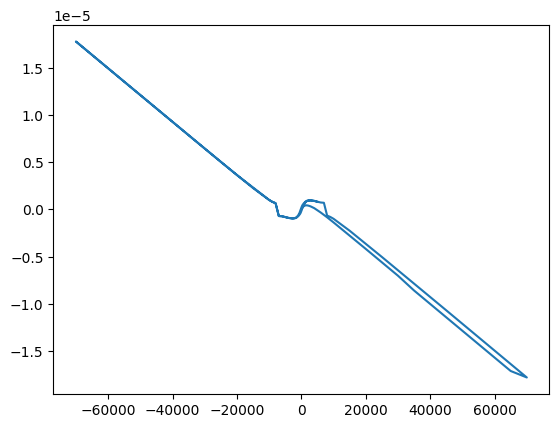

In [6]:
plt.plot(H_new,M_new)
# plt.plot(M_v2, H_v2)
# plt.plot(M_old, H_old)
plt.show()




# len(M_new)

-2.8176479460776783e-10

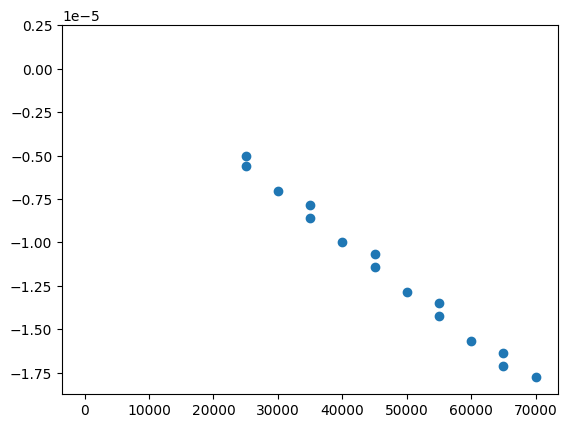

In [7]:
x_new, y_new = get_lin_fit(M_new, H_new, -5E-6)
x_old, y_old = get_lin_fit(M_old, H_old, -5E-6)
x_v2, y_v2 = get_lin_fit(M_v2, H_v2, -5E-6)

a_new, b_new = scipy.stats.linregress(x_new, y_new)[:2]
a_old, b_old = scipy.stats.linregress(x_old, y_old)[:2]
a_v2, b_v2 = scipy.stats.linregress(x_v2, y_v2)[:2]



# plt.plot(M_new, H_new)
# plt.plot(M_old, H_old)
# plt.plot(M_v2, H_v2)


plt.scatter(x_new, y_new)
plt.plot(M_new, func(M_new, a_new, b_new))


a_new

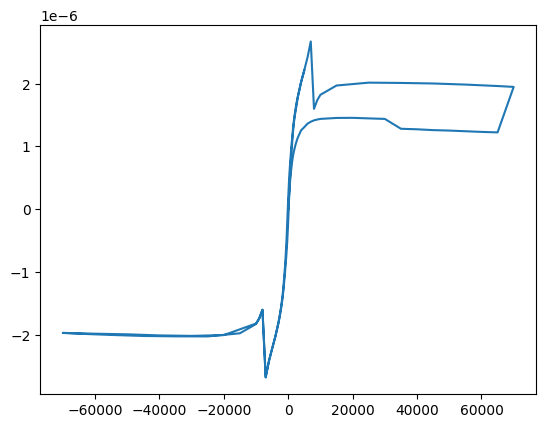

In [8]:
M_old_clear = np.zeros(len(M_old))
M_new_clear = np.zeros(len(M_new))
M_v2_clear = np.zeros(len(M_v2))


for i in range(len(M_old)):
    M_old_clear[i] = M_old[i] - H_old[i]*a_old


for i in range(len(M_new)):
    M_new_clear[i] = M_new[i] - H_new[i]*a_new


for i in range(len(M_v2)):
    M_v2_clear[i] = M_v2[i] - H_v2[i]*a_v2


plt.plot(H_new,M_new_clear)
# plt.plot(M_new, H_new)

# plt.plot(M_old, H_old_clear)
# plt.plot(M_v2, H_v2_clear)
# print(len(H_v2))


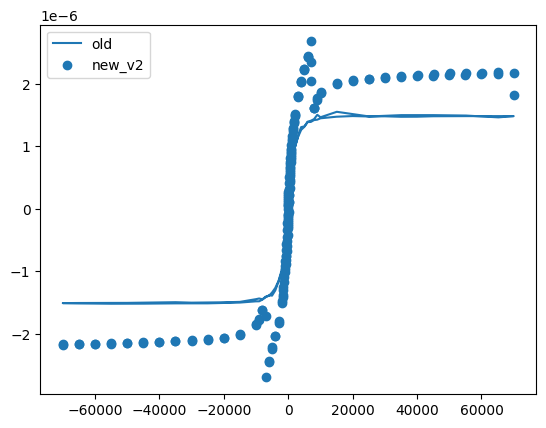

In [9]:
# plt.plot(M_v2, func(M_v2, *popt_v2))
# plt.plot(H_new, M_new_clear, label='new')
plt.plot(H_old, M_old_clear, label='old')
plt.scatter(H_v2, M_v2_clear, label='new_v2')
plt.legend()
plt.show()
#obciąć te igły


In [10]:
#jezelim jest f zlowzona ktoera opisuje wiele wkladow w caly6m zakresie to wredy mozemy dofitowac calowsc i odjac jakas czesc (tak jest z cieplem wlasciwym).
#Ale jesli jest tak w malych polach widzimy petle histerezy i to nie paramagnetyka to wtedy to co zroiblam  by wyszlo, ale mamy w malych polach wiec dopiero trzeba odjac
#jak juz nie ma zadnego wp;lywu probka.

In [11]:
M_tvT, H_tvT, T_tvT = calculate_MvH('STO-N10-2g-15a-500C-vac-MvT-231114.rso.csv')
M_tvT_old, H_tvT_old, T_tvT_old = calculate_MvH('STO-N10-2g-15a-500C-vac_MvT_H-300_Oe-K-full_220119.rso.csv')


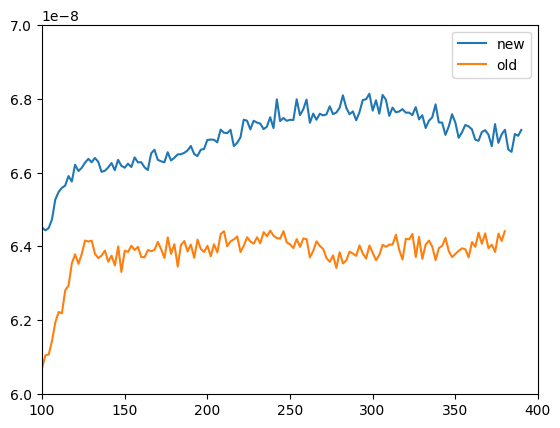

In [12]:
plt.plot(T_tvT, M_tvT, label='new')
plt.plot(T_tvT_old, M_tvT_old, label='old')
plt.xlim(100, 400)
plt.ylim(6E-8, 7E-8)
plt.legend()
plt.show()

In [13]:
def clear_peak(H:list, M:list):
    li_by_H_order = list(zip(H, M))

    sorted(li_by_H_order, key=lambda l:l[0])    #źle sortuje, chyba dubluje

    print(li_by_H_order)

    for i in range(len(M)):
        if li_by_H_order[i][1] == max(M):
            idx_max_M = i
        if li_by_H_order[i][1] == min(M):
            idx_min_M = i


    new_H = []
    new_M = []
    for j in range(1, len(M)):
        for i in range(1, len(M)):
            if li_by_H_order[i][1] > li_by_H_order[i-1][1]:
                new_H.append(li_by_H_order[i][0])
                new_M.append(li_by_H_order[i][1])
   
    for i in range(idx_max_M, idx_min_M):
        if new_M[i] < new_M[idx_min_M-1] or new_M[i] > new_M[idx_max_M+1]:
            new_H.pop(i)
            new_M.pop(i)


    li_clean = list(zip(new_H, new_M))

    M_max = new_M[idx_max_M]
    M_min = new_M[idx_min_M]

    H_max = new_H[idx_max_M]
    H_min = new_H[idx_min_M]

    print(idx_max_M, idx_min_M)

    # M_left = new_M[idx_min_M-1]
    # M_right = new_M[idx_max_M+1]

    # H_left = new_H[idx_min_M-1]
    # H_right = new_H[idx_max_M+1]


    # return left, H_left, right, H_right, H_min, M_min, H_clear, M_clear
    # return new_H, new_M, H_left, M_left, H_right, M_right
    return new_H, new_M, H_max, M_max, H_min, M_min

In [14]:
# M_left, H_left, M_right, H_right, H_min, M_min, H_v2_peakless, M_v2_peakless = clear_peak(H_v2, M_v2_clear)
# H_v2_peakless, M_v2_peakless, lh, lm, rh, rm= clear_peak(H_v2, M_v2_clear)
H_v2_peakless, M_v2_peakless, maxh, maxm, minh, minm= clear_peak(H_v2, M_v2_clear)

[(0.0, 0.0), (50.47331, 6.405138127283887e-08), (100.684, 1.1450777157877919e-07), (201.1638, 2.2101731130876714e-07), (301.4541, 3.2367655399514824e-07), (401.9338, 4.243352224808893e-07), (502.3846, 5.217309011355788e-07), (602.7621, 6.192632319246514e-07), (703.0231, 7.116570355462915e-07), (803.4592, 8.013855572187046e-07), (903.8223, 8.627573151075511e-07), (1004.331, 9.418838150179002e-07), (1255.181, 1.118464589948615e-06), (1506.118, 1.2726149842546973e-06), (1757.23, 1.392154495472911e-06), (2008.283, 1.4970572065416005e-06), (3011.696, 1.808955286131907e-06), (4015.326, 2.0494390307257503e-06), (5019.03, 2.227306833998919e-06), (6022.225, 2.4373380950384275e-06), (7013.165, 2.3588730486841426e-06), (8017.086, 1.615182020616413e-06), (9021.01, 1.7425591688687786e-06), (10025.52, 1.8530349034525197e-06), (15000.0, 2.0076595741275716e-06), (20000.0, 2.0602212274584784e-06), (25000.0, 2.0847914104400767e-06), (30000.0, 2.102597783511033e-06), (35000.0, 2.1121344571506317e-06), (4

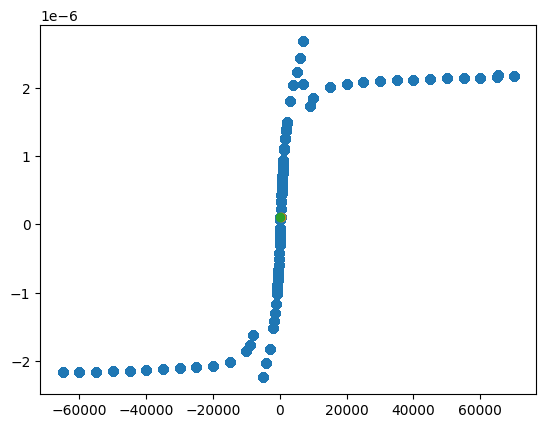

In [15]:
# plt.scatter(H_v2, M_v2_clear)
# # plt.scatter([H_right, H_left], [M_right, M_left])
# plt.scatter(H_min, M_min)
plt.scatter(H_v2_peakless, M_v2_peakless)
# plt.scatter(lh, lm)
# plt.scatter(rh, rm)
plt.scatter(maxh, maxm)
plt.scatter(minh, minm)